In [5]:
import pandas as pd
import emot
import numpy as np
from heapq import nlargest
df = pd.read_csv('/Users/corinnesteuk/PycharmProjects/pythonProject/Joy-11-2021.csv')

In [ ]:

tweet_emojis = {}
emoji_meanings = {}
full_emoji_dict = {}
index = 0
for tweet in df['content']:
    
    # find emoji meanings
    emot_obj = emot.core.emot()
    emojis = emot_obj.emoji(tweet)
    x = emojis['value']
    tweet_emojis[index] = x
    # if there are emojis in the tweet replace them with their meanings
    if len(emojis['value']) > 0:
        e = []
        for i in range(len(emojis['value'])):

            meaning = emojis['mean'][i]
            clean_meaning = meaning.replace("_", " ")
            clean_meaning = clean_meaning.replace(":", "")
            e.append(clean_meaning)
        emoji_meanings[index] = e
    else:
        e = 'Null'
        emoji_meanings[index] = 'Null'
    full_emoji_dict[index] = [x, e]
    index += 1

#dictionary of the actual emoji pictures (key: index, value: list of emoji pictures)
# print(tweet_emojis)
#dictionary of the emoji meanings (key: index, value: list of cleaned string emoji meanings)
# print(emoji_meanings)

#combination of the above two dictionaries
#key: index; value: list of 2 - postion 0 (of this list) has a list of the emoji pictures and 
#position 1 has a list of the emoji string meanings
#print(full_emoji_dict)
print('done')

In [ ]:
#list of emoji meanings to use in the count_elements function
#removes the null entries from the emoji_meanings dictionary values
val = emoji_meanings.values()

def remove_meaning_nulls(i):
    val1 = []
    for i in val:
        if i != "Null":
            for j in i:
                val1.append(j)
    return val1
emoji_text = remove_meaning_nulls(val)
#print(emoji_text)


In [ ]:
#removing the skin tone words and colors from the emoji meanings
stopwords = ['medium-light', 'medium', 'dark', 'skin', 'tone', 'light', 'medium-dark', 'black', 'brown', 'white','blue', 'red', 'orange', 'yellow', 'green', 'purple']

In [ ]:
#using the stopwords for skin tone above and removing them 
# this should happen before the counting elements
#returns a list of the clean emoji meanings
def remove_stopwords(values):
    new = []
    for k in values:
        querywords = k.split()
        resultwords  = [word for word in querywords if word.lower() not in stopwords]
        result = ' '.join(resultwords)    
        new.append(result)
    return new
clean_emoji_meanings = remove_stopwords(emoji_text)
#print(clean_emoji_meanings)


In [ ]:
#function to count the number of elements appearing in a list 
#using the list of string emoji meanings (that we removed the nulls from)

def count_elements(listOfElems):
    emoji_count = {}
    ''' Check if given list contains any duplicates '''
    for elem in listOfElems:
        emoji_count[elem] = listOfElems.count(elem)
    return emoji_count

#dictionary- key: emoji textual meaning; value: number of times it shows up in data
emoji_dict = count_elements(clean_emoji_meanings)
#print(emoji_dict)

In [ ]:

#What are the top 10 most frequently used emojis in dictionary?

def top_ten_emojis(emoji_dict):
    i = 0
    emoji_words = list(emoji_dict.keys())
    emoji_counts = list(emoji_dict.values())
    popular_emojis = {}
    indices = range(0, len(emoji_counts)-1)
    maximum_counts = nlargest(10, emoji_counts)
    while i < len(emoji_counts):
        if emoji_counts[i] in maximum_counts:
            popular_emojis[emoji_words[i]] = emoji_counts[i]
        i +=1
    return popular_emojis
popular_emojis = top_ten_emojis(emoji_dict)
print(popular_emojis)
    



In [30]:
#top 10 in full data set 
full_emojis = {'heart': 1331, 'smiling face with hearts': 225, 'loudly crying face': 503, 'sparkles': 227, 'folded hands': 298, 'smiling face with heart-eyes': 179, 'fire': 254, 'face with tears of joy': 741, 'raising hands': 178, 'rolling on the floor laughing': 282}

#top 10 in Joy tweets
joy_emojis = {'heart': 1022, 'smiling face with hearts': 177, 'loudly crying face': 197, 'sparkles': 184, 'two hearts': 103, 'folded hands': 194, 'smiling face with heart-eyes': 111, 'seedling': 132, 'face with tears of joy': 216, 'raising hands': 121}
joy_emojis = {'heart': 1022, 'face with tears of joy': 216, 'loudly crying face' : 197, 'folded hands': 194, 'sparkles': 184, 'smiling face with hearts': 177, 'seedling': 132, 'raising hands': 121, 'smiling face with heart-eyes': 111, 'two hearts': 103}
#top 10 in Non-Joy tweets
nonjoy_emojis = {'fire': 155, 'face with tears of joy': 525, 'skull': 72, 'folded hands': 104, 'heart': 309, 'smiling face with heart-eyes': 68, 'loudly crying face': 306, 'pleading face': 79, 'rolling on the floor laughing': 200, 'clapping hands': 63}
nonjoy_emojis = {'face with tears of joy': 525, 'heart': 309, 'loudly crying face': 306, 'rolling on the floor laughing':200, 'fire':155, 'folded hands':104, 'pleading face':79, 'skull':72, 'smiling face with heart-eyes':68, 'clapping hands': 63}

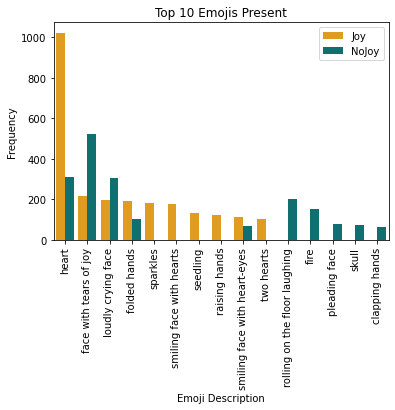

<Figure size 432x288 with 0 Axes>

In [104]:
#visual for all these values 
#we might not need the full_emojis
# j_df = pd.DataFrame.from_dict(joy_emojis, orient='index')
# j_df = sorted(j_df[0])
# print(j_df)

nj_df = pd.DataFrame([['heart', 1022, 'Joy'],
['face with tears of joy', 216, 'Joy'],
['loudly crying face', 197, 'Joy'],
['folded hands', 194, 'Joy'],
['sparkles', 184, 'Joy'],
['smiling face with hearts', 177, 'Joy'],
['seedling', 132, 'Joy'],
['raising hands', 121, 'Joy'],
['smiling face with heart-eyes', 111, 'Joy'],
['two hearts', 103, 'Joy'],
['face with tears of joy', 525, 'NoJoy'],
['heart', 309, 'NoJoy'],
['loudly crying face', 306, 'NoJoy'],
['rolling on the floor laughing', 200, 'NoJoy'],
['fire', 155, 'NoJoy'],
['folded hands', 104, 'NoJoy'],
['pleading face', 79, 'NoJoy'],
['skull', 72, 'NoJoy'],
['smiling face with heart-eyes', 68, 'NoJoy'],
['clapping hands', 63, 'NoJoy']], columns = ["Emoji", "Frequency", "Joy"])

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x = "Emoji", y = "Frequency", data = nj_df, hue = "Joy", palette = ["orange", "teal"], errwidth = .25)
plt.xticks(rotation='90')
plt.xlabel("Emoji Description")
plt.ylabel("Frequency")
plt.title("Top 10 Emojis Present")
plt.legend(loc='upper right')
plt.show()
plt.savefig('Top10Emojis.png')

In [15]:
#matching the emoji menaings back with the pictures
#using a emoji data set with the meanings and pictures from Kaggle
#https://www.kaggle.com/datasets/subinium/emojiimage-dataset

emo = pd.read_csv('/Users/corinnesteuk/PycharmProjects/pythonProject/full_emoji.csv')
d = {**joy_emojis, **nonjoy_emojis}
emo = pd.DataFrame(data = (emo['emoji'], emo['name']))
emo = emo.T
i = 0
k = list(d.keys())
new_dict = {}
while  i < len(d.keys()): 
    j = 0
    while j < len(emo['name']):
        if k[i] == emo['name'][j]:
            new_dict[k[i]] = emo['emoji'][j]
        j +=1
        
    i+=1
        
    

    

In [16]:
#making a table for the visual above
from tabulate import tabulate
t = []
for k, v in new_dict.items():
    t.append([k, v])

headers = ["Emoji Meaning", "Emoji Image"]
table = tabulate(t, headers, tablefmt="grid")
print(table)
with open('EmojiLegendTable.txt', 'w') as f:
    f.write(table)

+-------------------------------+---------------+
| Emoji Meaning                 | Emoji Image   |
+===============================+===============+
| smiling face with hearts      | 🥰            |
+-------------------------------+---------------+
| loudly crying face            | 😭            |
+-------------------------------+---------------+
| sparkles                      | ✨            |
+-------------------------------+---------------+
| two hearts                    | 💕            |
+-------------------------------+---------------+
| folded hands                  | 🙏            |
+-------------------------------+---------------+
| smiling face with heart-eyes  | 😍            |
+-------------------------------+---------------+
| seedling                      | 🌱            |
+-------------------------------+---------------+
| face with tears of joy        | 😂            |
+-------------------------------+---------------+
| raising hands                 | 🙌            |
+--------